<a href="https://colab.research.google.com/github/Yan4S/DataAnalysis/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Yan4S/DataAnalysis.git

Cloning into 'DataAnalysis'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 231 (delta 30), reused 0 (delta 0), pack-reused 167 (from 1)
Receiving objects: 100% (231/231), 1.88 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Optional


folderPath = 'DataAnalysis/Kaggle/'

## Step 1: EDA

#### (1-1) Load Data

In [6]:
raw_train = pd.read_csv(folderPath+'house_train.csv')
raw_X_test = pd.read_csv(folderPath+'house_test.csv')
raw_X_train = raw_train.drop('SalePrice', axis=1)
raw_y_train = raw_train['SalePrice']

In [43]:
num_feas = raw_X_train.select_dtypes(include=np.number).columns
cat_feas = raw_X_train.select_dtypes(exclude=np.number).columns

print(f'Numerical Features ({len(num_feas)}):\n {num_feas}')
print(f'Categorical Features ({len(cat_feas)}):\n {cat_feas}')

raw_X_train.describe()

Numerical Features (37):
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Categorical Features (43):
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


#### (1-2) Missing Data
* Choose dropna threshold later

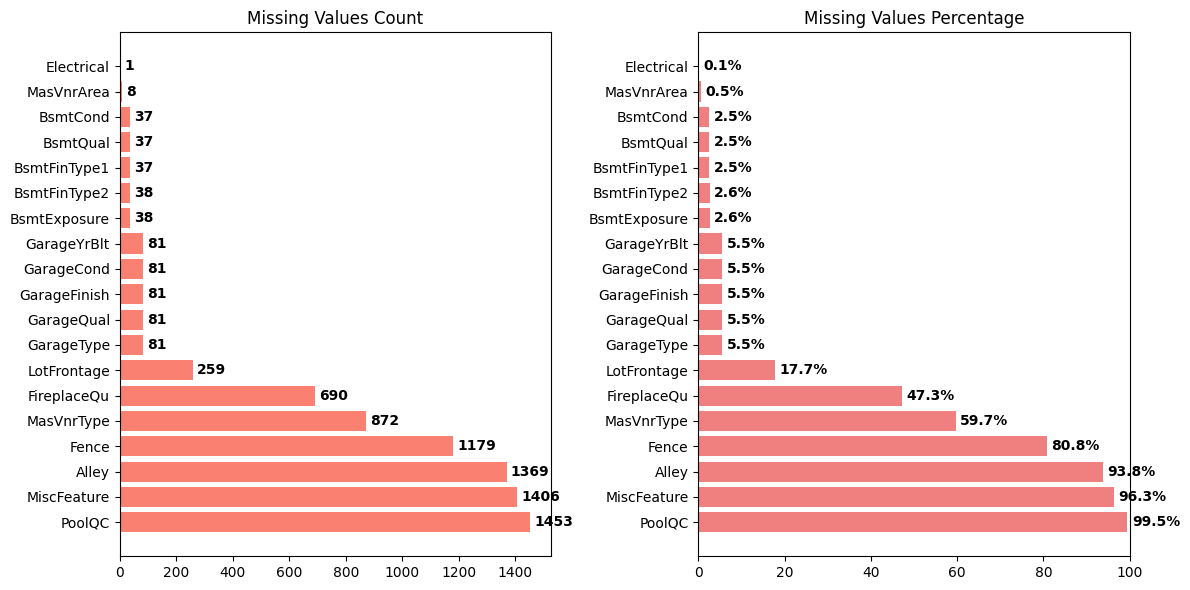

In [40]:
def plot_missing_values(X: pd.DataFrame, col_names: Optional[List[str]] = None):
    """Plot missing values with numbers on bars"""
    if col_names is None:
        data_to_plot = X
    else:
        data_to_plot = X[col_names]

    missing_count = data_to_plot.isnull().sum()
    missing_pct = (missing_count / len(data_to_plot)) * 100
    missing_data = pd.DataFrame({
        'Column': missing_count.index,
        'Missing_Count': missing_count.values,
        'Missing_Percent': missing_pct.values
    }).sort_values('Missing_Percent', ascending=False)
    missing_data = missing_data[missing_data['Missing_Count'] > 0]

    if missing_data.empty:
        logging.info("No missing values found")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Count plot
    bars1 = ax1.barh(missing_data['Column'], missing_data['Missing_Count'], color='salmon')
    ax1.set_title('Missing Values Count')

    # Add numbers on count bars
    for bar in bars1:
        width = bar.get_width()
        ax1.text(width + (max(missing_data['Missing_Count']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold')

    # Percentage plot
    bars2 = ax2.barh(missing_data['Column'], missing_data['Missing_Percent'], color='lightcoral')
    ax2.set_title('Missing Values Percentage')
    ax2.set_xlim(0, 100)

    # Add numbers on percentage bars
    for bar in bars2:
        width = bar.get_width()
        ax2.text(width + 1,  # Small offset from the end of the bar
                bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()
plot_missing_values(raw_X_train)

#### (1-3) Plot Data

In [ ]:
num_feas = raw_X_train.select_dtypes(include=np.number).columns
cat_fea = raw_X_train.select_dtypes(exclude=np.number).columns



#### (1-4) Corr(Xi, y)

## (Step 2) Data Preprocessing

In [41]:
drop_missing_thres = 0.2
